Libraries

In [ ]:
#Importing Libraries suitable for Data manipulation & Mathematical operations:
import pandas as pd
import numpy as np

#Importing Libraries suitable for Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Dataset

In [ ]:
d_url = "https://raw.githubusercontent.com//LEOGLAUDIAS/MSc-AI-BC-Prediction/main/breast_cancer_dataset.csv"
d = pd.read_csv(d_url)

#### A . Data Exploration

Dataset preview:

In [ ]:
print(d.head().T)

                                0         1         2         3         4
id                         842302    842517  84300903  84348301  84358402
diagnosis                       M         M         M         M         M
radius_mean                 17.99     20.57     19.69     11.42     20.29
texture_mean                10.38     17.77     21.25     20.38     14.34
perimeter_mean              122.8     132.9     130.0     77.58     135.1
area_mean                  1001.0    1326.0    1203.0     386.1    1297.0
smoothness_mean            0.1184   0.08474    0.1096    0.1425    0.1003
compactness_mean           0.2776   0.07864    0.1599    0.2839    0.1328
concavity_mean             0.3001    0.0869    0.1974    0.2414     0.198
concave points_mean        0.1471   0.07017    0.1279    0.1052    0.1043
symmetry_mean              0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension_mean    0.07871   0.05667   0.05999   0.09744   0.05883
radius_se                   1.095    0

Identification of Datatypes and Anomalies [Missing & Duplicate Values] in the Dataset:

In [ ]:
d_mv = d.isnull().sum().sum()
d_dt = d.dtypes
d_dup = d.duplicated().sum()

In [ ]:
print("Missing Values:",d_mv)
print("Duplicate Values:",d_dup)

Missing Values: 0
Duplicate Values: 0


In [ ]:
print(pd.DataFrame({"Missing Values": d_mv,"Duplicate Values": d_dup,"Data Types": d_dt}))

                         Missing Values  Duplicate Values Data Types
id                                    0                 0      int64
diagnosis                             0                 0     object
radius_mean                           0                 0    float64
texture_mean                          0                 0    float64
perimeter_mean                        0                 0    float64
area_mean                             0                 0    float64
smoothness_mean                       0                 0    float64
compactness_mean                      0                 0    float64
concavity_mean                        0                 0    float64
concave points_mean                   0                 0    float64
symmetry_mean                         0                 0    float64
fractal_dimension_mean                0                 0    float64
radius_se                             0                 0    float64
texture_se                        

In [ ]:
d.drop(columns=['id'], axis=1, inplace=True) #dropping 'id' since it has no use in training models

In [ ]:
ncols_d1 = d.drop(columns=['diagnosis']).describe().T
display(ncols_d1)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### B. Data Preprocessing

##### Initial Visualizations

diagnosis
B    357
M    212
Name: count, dtype: int64


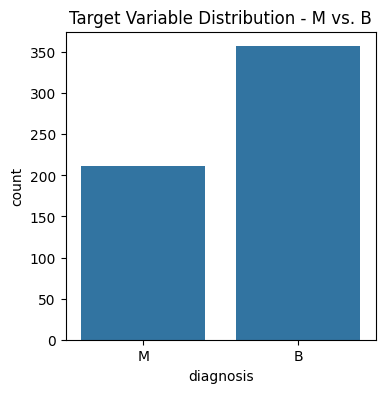

In [ ]:
print(d['diagnosis'].value_counts())

plt.figure(figsize=(4,4))
plt.title('Target Variable Distribution - M vs. B')
sns.countplot(x=d['diagnosis'])
plt.show()

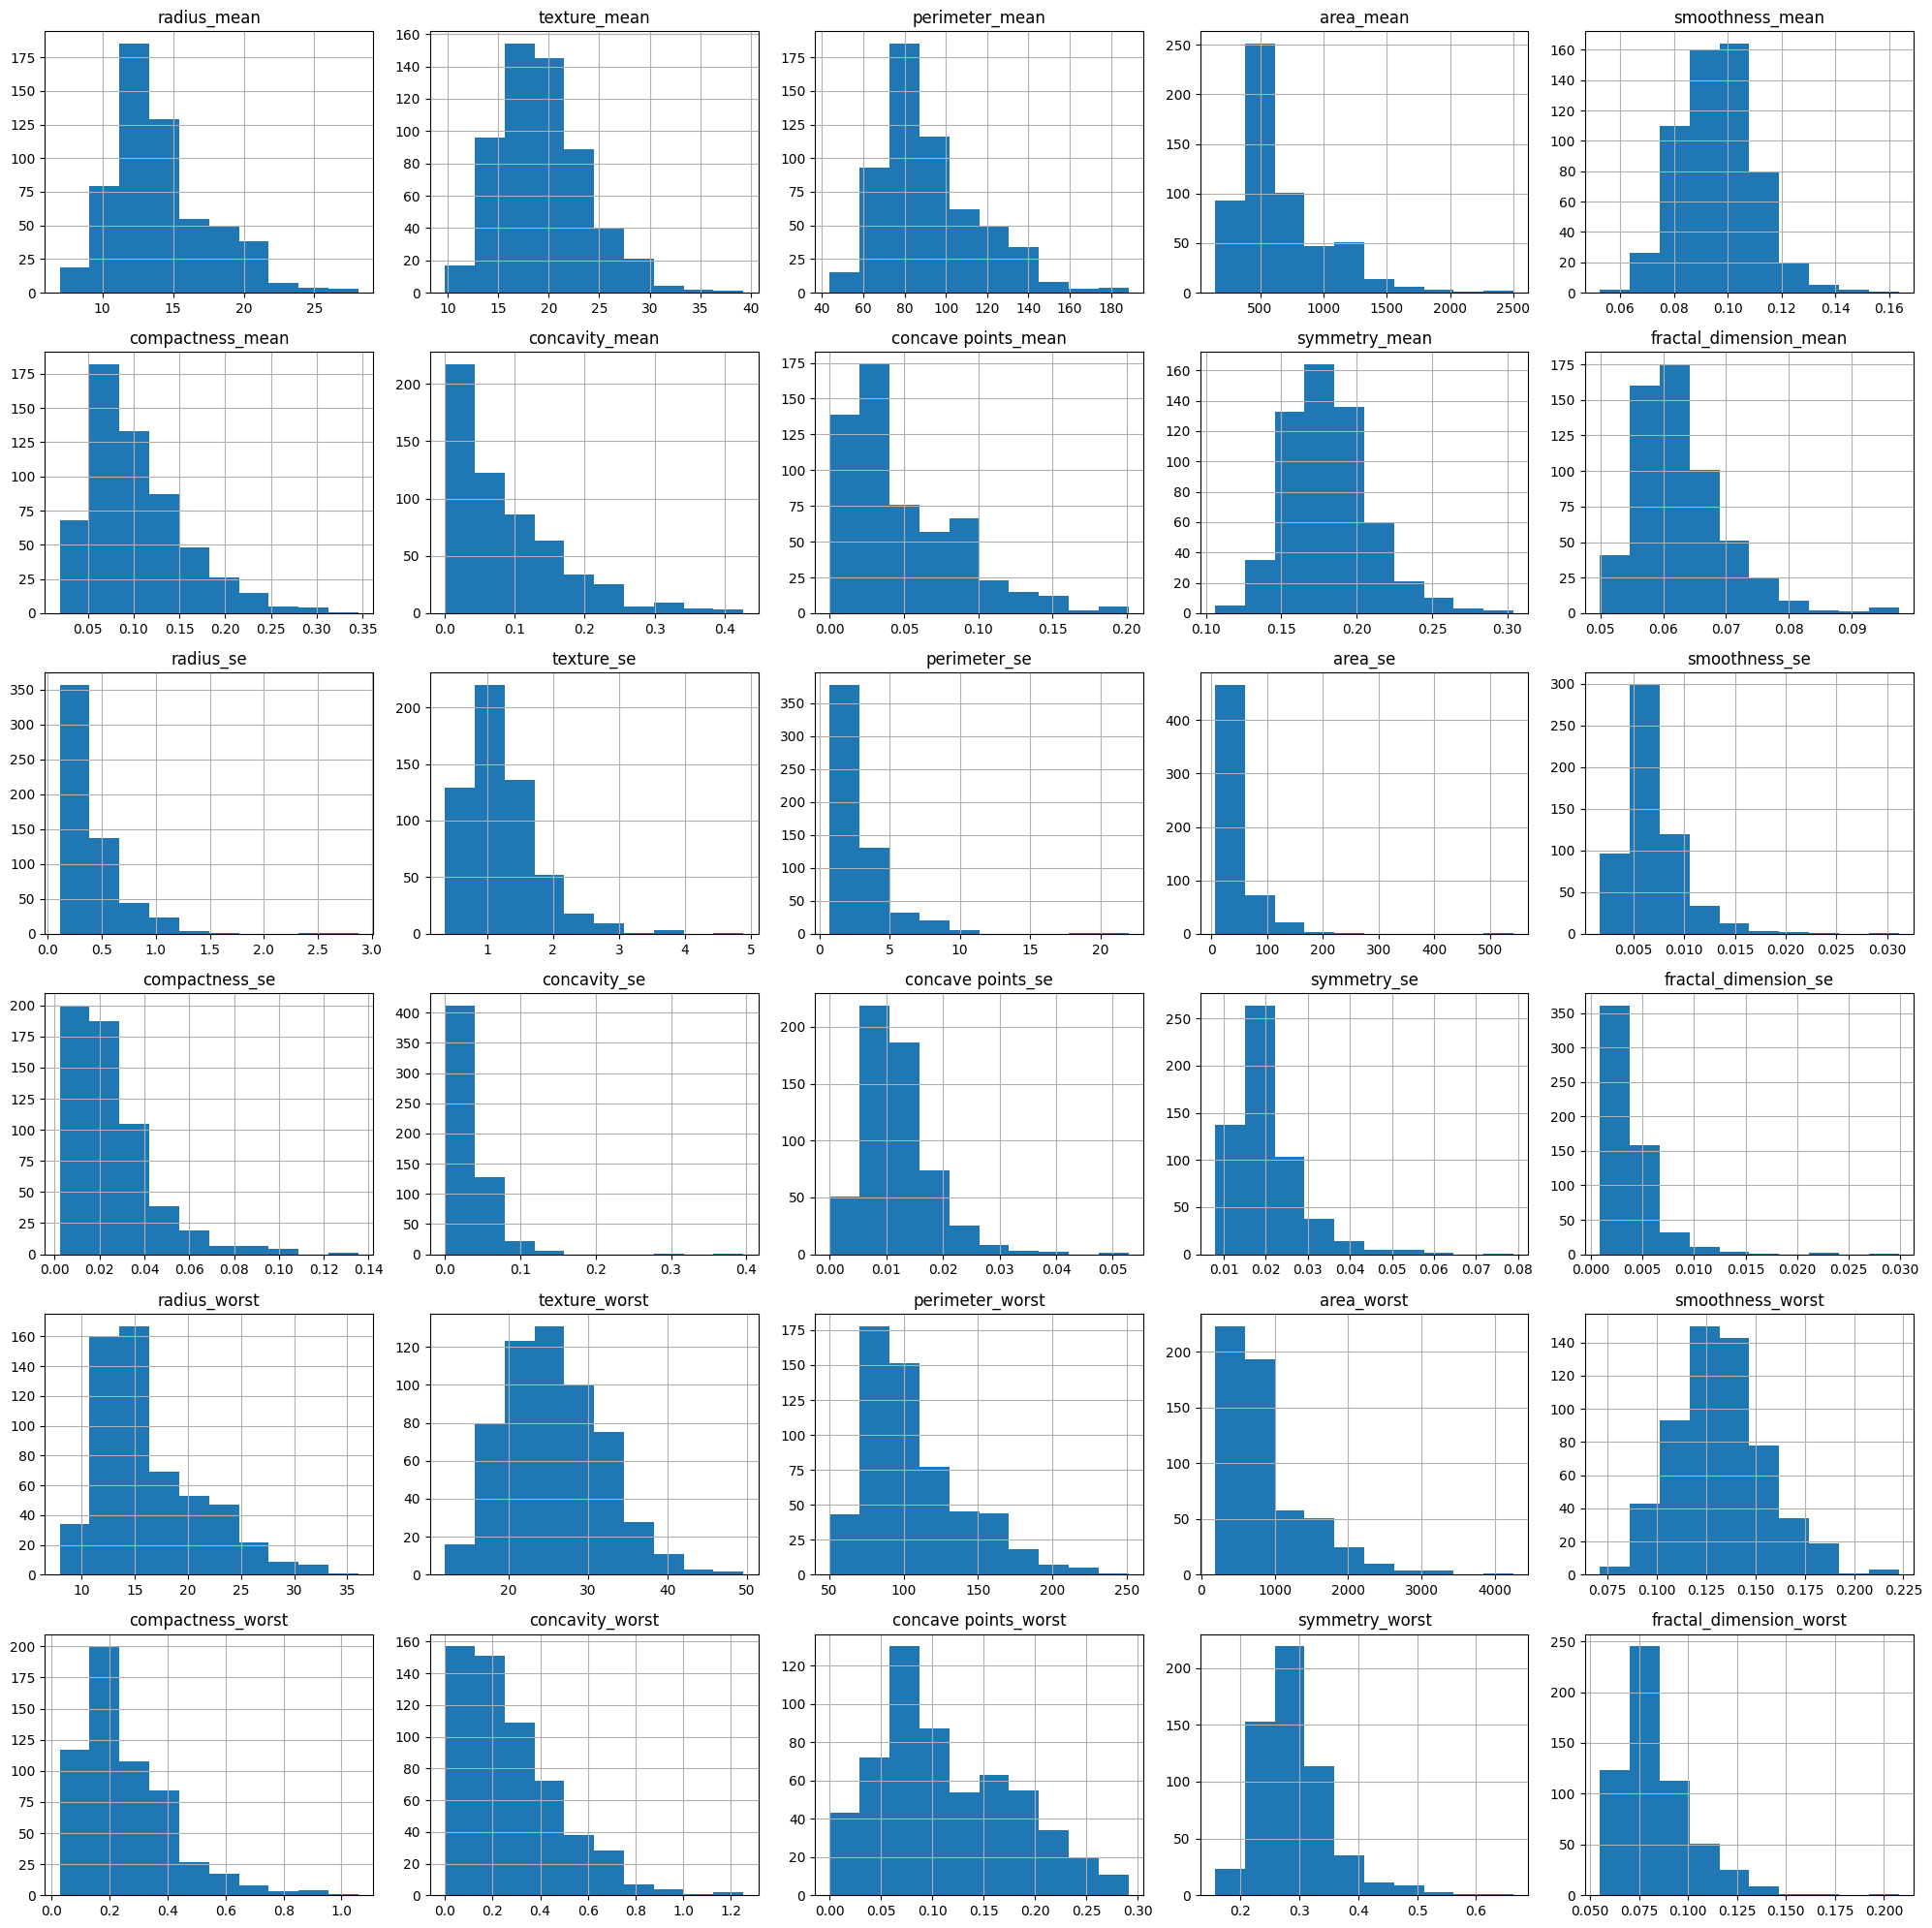

In [ ]:
d.hist(d.columns[1:32], figsize=(20, 20))
plt.tight_layout()
plt.show()

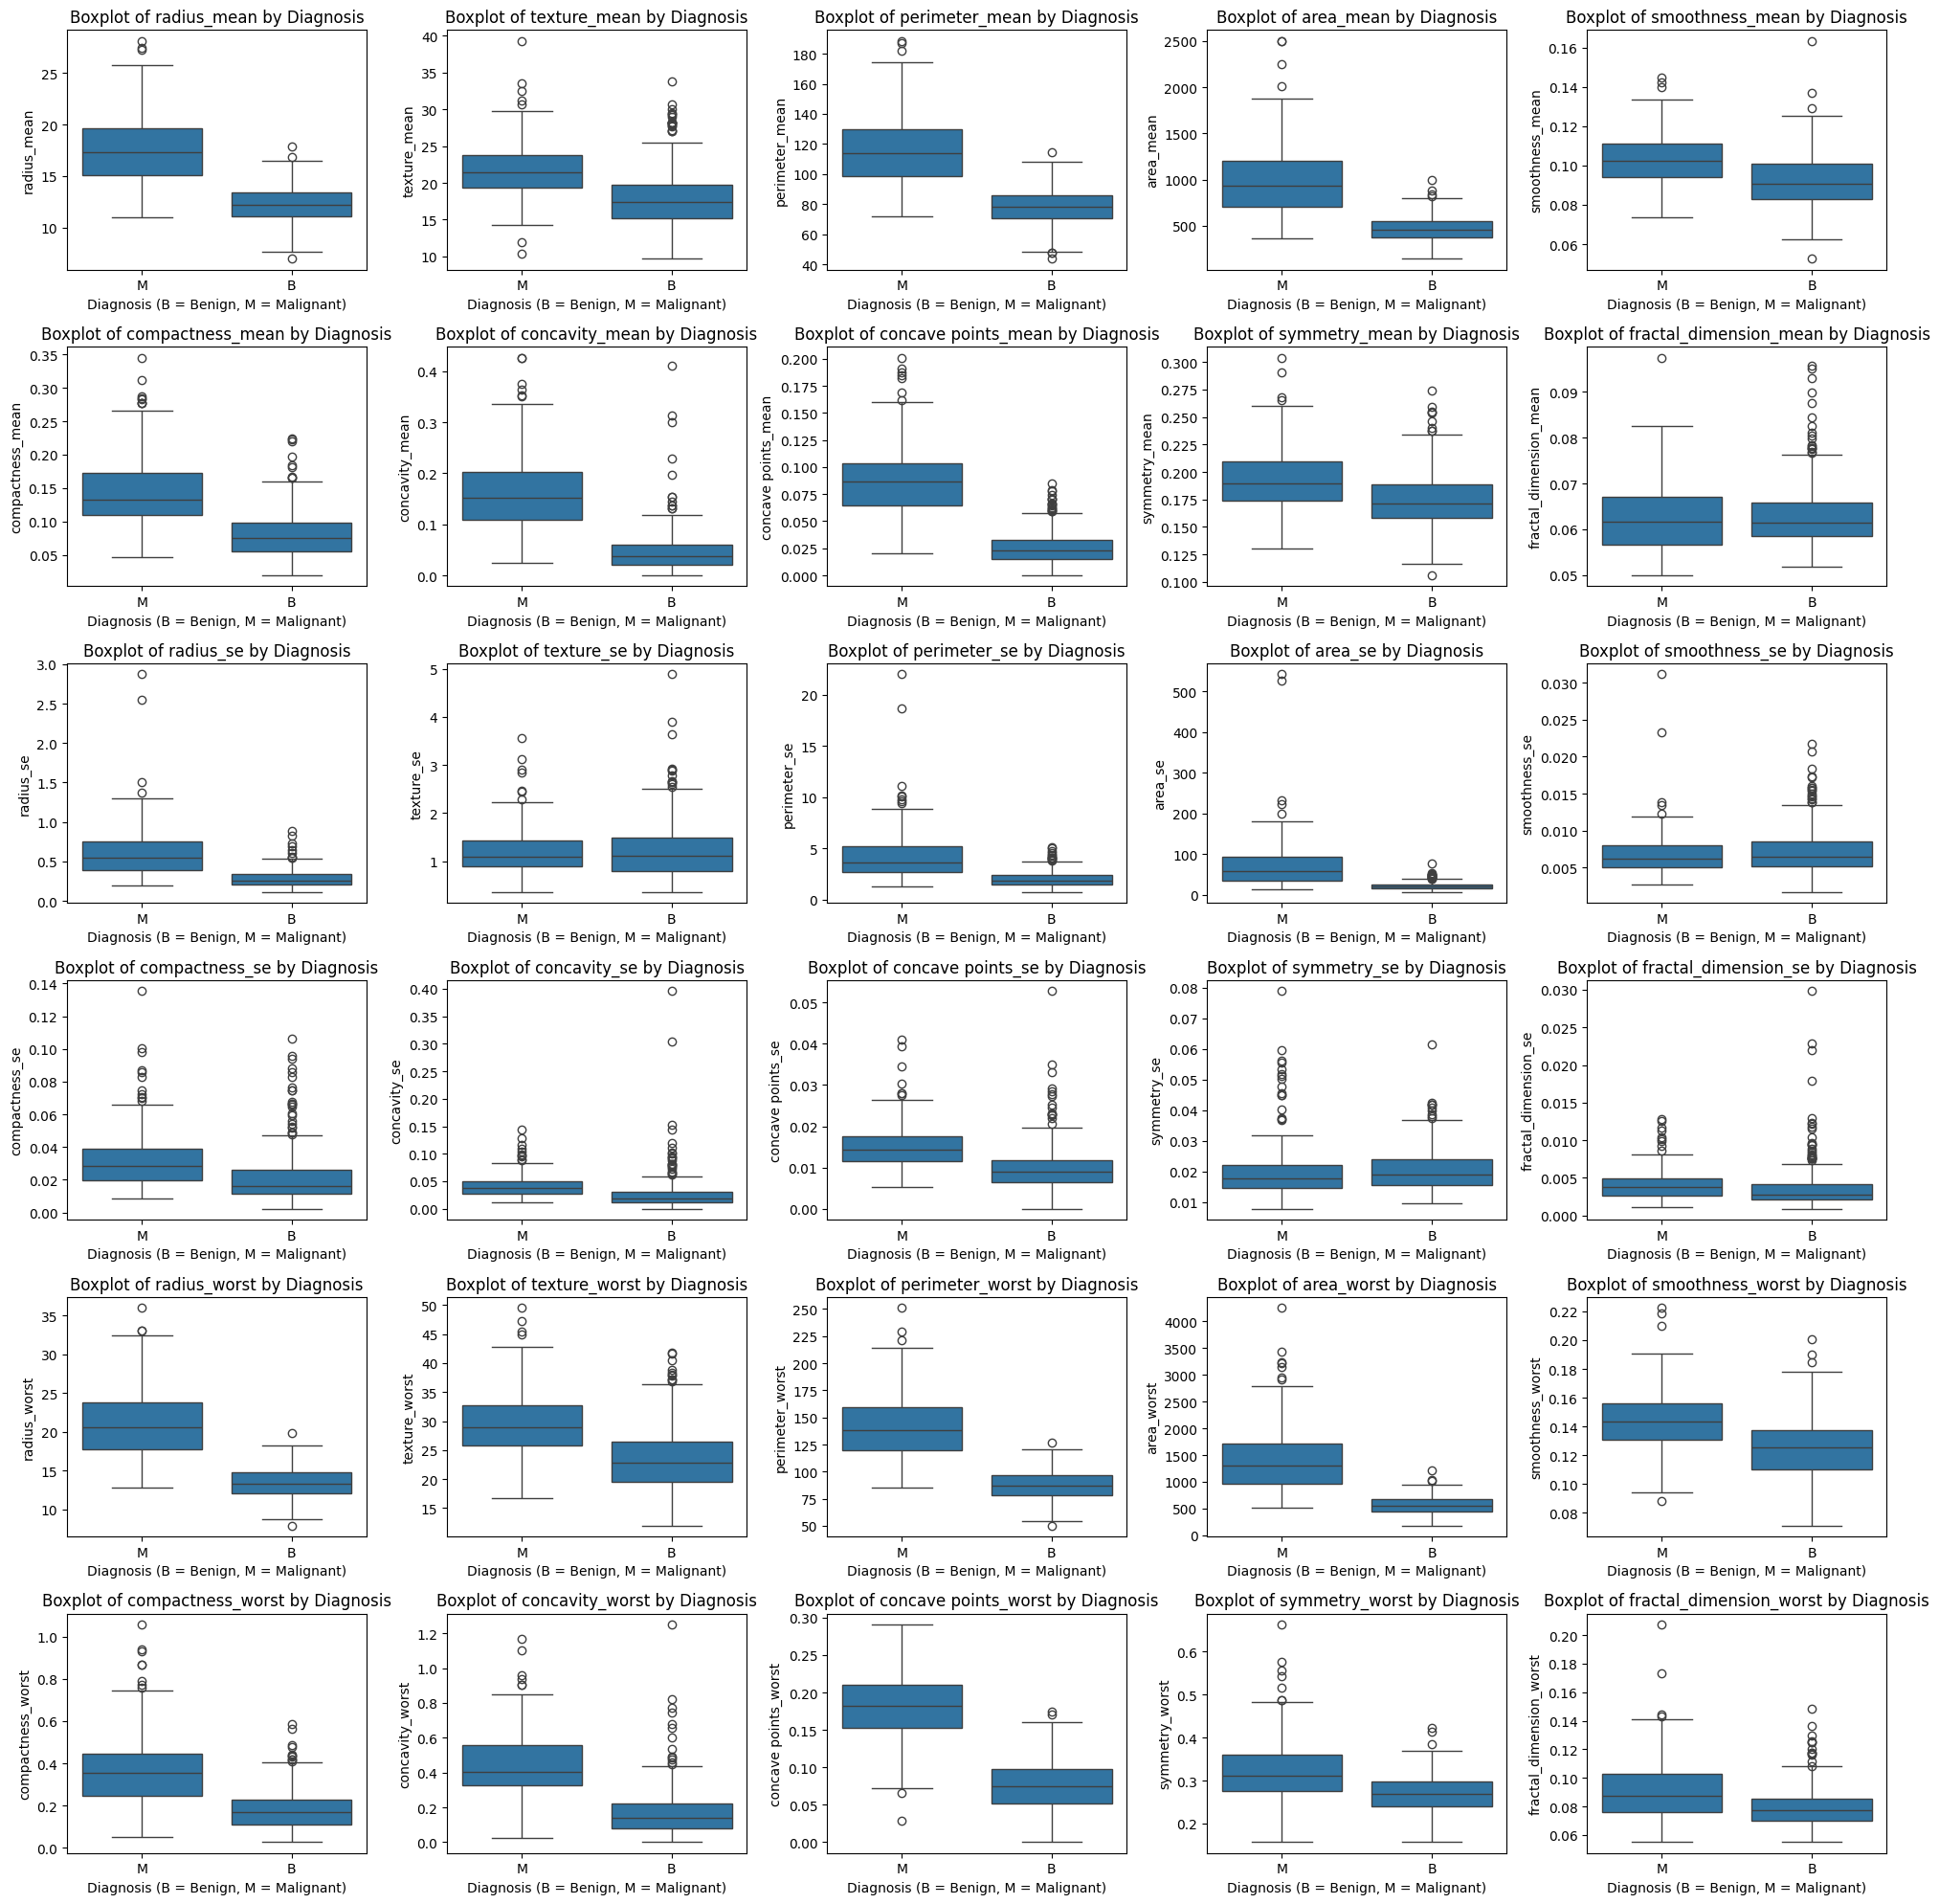

In [ ]:
ncols_d1 = d.columns[1:32]

# Creating boxplots for each feature grouped by diagnosis (B = Benign, M = Malignant)
fig, ax = plt.subplots(6,5, figsize=(20, 20))

for i, subplot in zip(ncols_d1, ax.flatten()):
    sns.boxplot(x='diagnosis', y=i, data=d, ax=subplot)
    subplot.set_title(f'Boxplot of {i} by Diagnosis')
    subplot.set_xlabel('Diagnosis (B = Benign, M = Malignant)')
    subplot.set_ylabel(i)

plt.tight_layout()
plt.show()

In [ ]:
# Assuming df is your Breast Cancer dataset (with 'diagnosis' already encoded and excluded)
ncols_d1 = d.columns[1:32]# Focus only on numeric features

# Create a copy to store cleaned data
d_cleaned = d[ncols_d1].copy()

# Apply IQR filtering for each column
# Iterate over the columns of df_cleaned instead of the original df
for col in d_cleaned.columns:
    Q25 = d_cleaned[col].quantile(0.25)
    Q75 = d_cleaned[col].quantile(0.75)
    IQR = Q75 - Q25

    lower_bound = Q25 - (IQR*1.5)
    upper_bound = Q75 + (IQR*1.5)

    # Remove outliers in each column
    d_cleaned = d_cleaned[(d_cleaned[col] >= lower_bound) & (d_cleaned[col] <= upper_bound)]

# Combine with diagnosis column again (reindex to match cleaned data)
diag_col_reind = d.loc[d_cleaned.index, 'diagnosis']
d_outl_rm = pd.concat([diag_col_reind, d_cleaned], axis=1)

print(d_outl_rm.head().T)

                               16        19        20        21        37
diagnosis                       M         B         B         B         B
radius_mean                 14.68     13.54     13.08     9.504     13.03
texture_mean                20.13     14.36     15.71     12.44     18.42
perimeter_mean              94.74     87.46     85.63     60.34     82.61
area_mean                   684.5     566.3     520.0     273.9     523.8
smoothness_mean           0.09867   0.09779    0.1075    0.1024   0.08983
compactness_mean            0.072   0.08129     0.127   0.06492   0.03766
concavity_mean            0.07395   0.06664   0.04568   0.02956   0.02562
concave points_mean       0.05259   0.04781    0.0311   0.02076   0.02923
symmetry_mean              0.1586    0.1885    0.1967    0.1815    0.1467
fractal_dimension_mean    0.05922   0.05766   0.06811   0.06905   0.05863
radius_se                  0.4727    0.2699    0.1852    0.2773    0.1839
texture_se                   1.24    0

In [ ]:
ncols_d1 = d.columns[1:32]

In [ ]:
d_skew_rm = np.log1p(d[d.columns[1:32]])

In [ ]:
diag_col_reind = d.loc[d_skew_rm.index, 'diagnosis']
d_f = pd.concat([diag_col_reind, d_skew_rm], axis=1)

In [ ]:
print(d_f.head().T)

                                0         1         2         3         4
diagnosis                       M         M         M         M         M
radius_mean              2.943913  3.071303   3.02965  2.519308  3.058237
texture_mean             2.431857   2.93226  3.102342  3.062456  2.730464
perimeter_mean           4.818667  4.897093  4.875197  4.364117   4.91339
area_mean                6.909753  7.190676  7.093405  5.958683   7.16858
smoothness_mean          0.111899   0.08134     0.104  0.133219  0.095583
compactness_mean         0.244983  0.075701  0.148334  0.249902  0.124692
concavity_mean           0.262441   0.08333  0.180153   0.21624  0.180653
concave points_mean      0.137237  0.067818  0.120357  0.100026  0.099212
symmetry_mean            0.216642  0.166531  0.188055  0.230874  0.166277
fractal_dimension_mean   0.075766  0.055122  0.058259   0.09298  0.057165
radius_se                0.739554  0.434053  0.557098  0.402527  0.563722
texture_se               0.644639  0.5

After removing Outliers & Skewness:

In [ ]:
ncols_d2 = d_outl_rm.drop(columns=['diagnosis'])

In [ ]:
ncols_d2 = d_f.drop(columns=['diagnosis'])

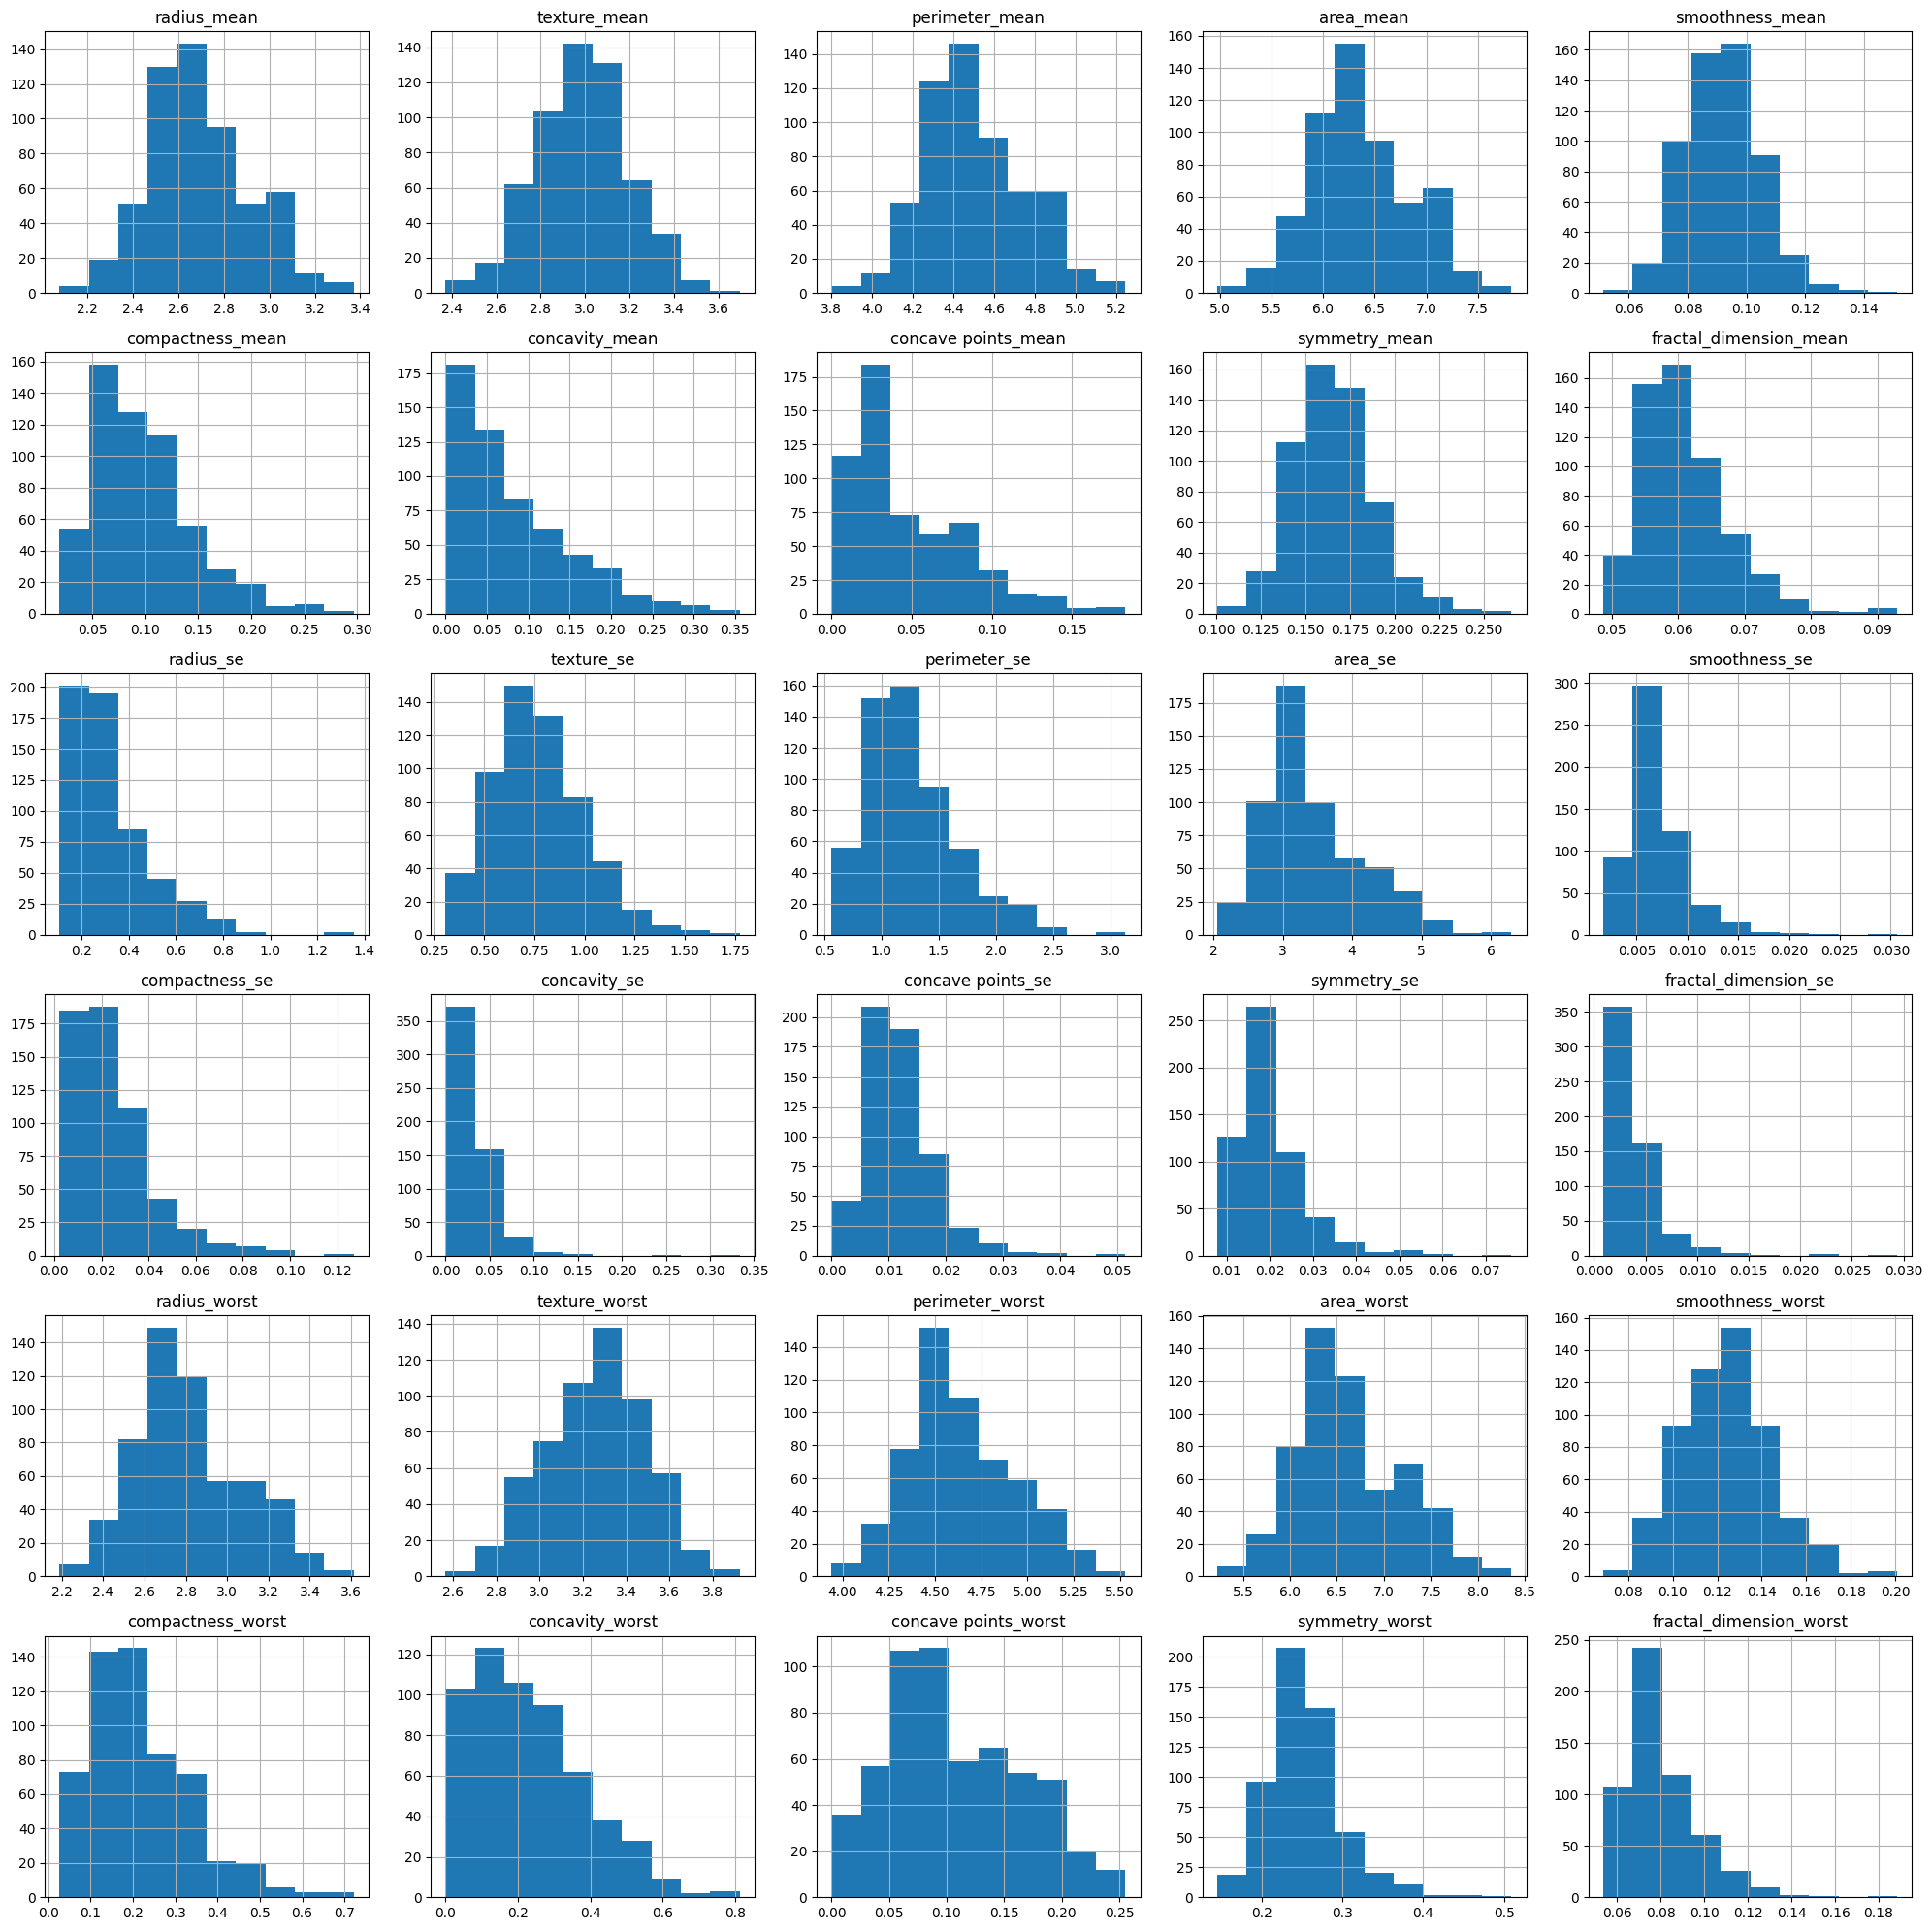

In [ ]:
# Plot histograms for the cleaned numerical data with the specified layout
ax_array = ncols_d2.hist(layout=(6, 5), figsize=(20, 20))
fig = ax_array.flatten()[0].get_figure()
plt.tight_layout()
plt.show()

Boxplots (for numerical features):

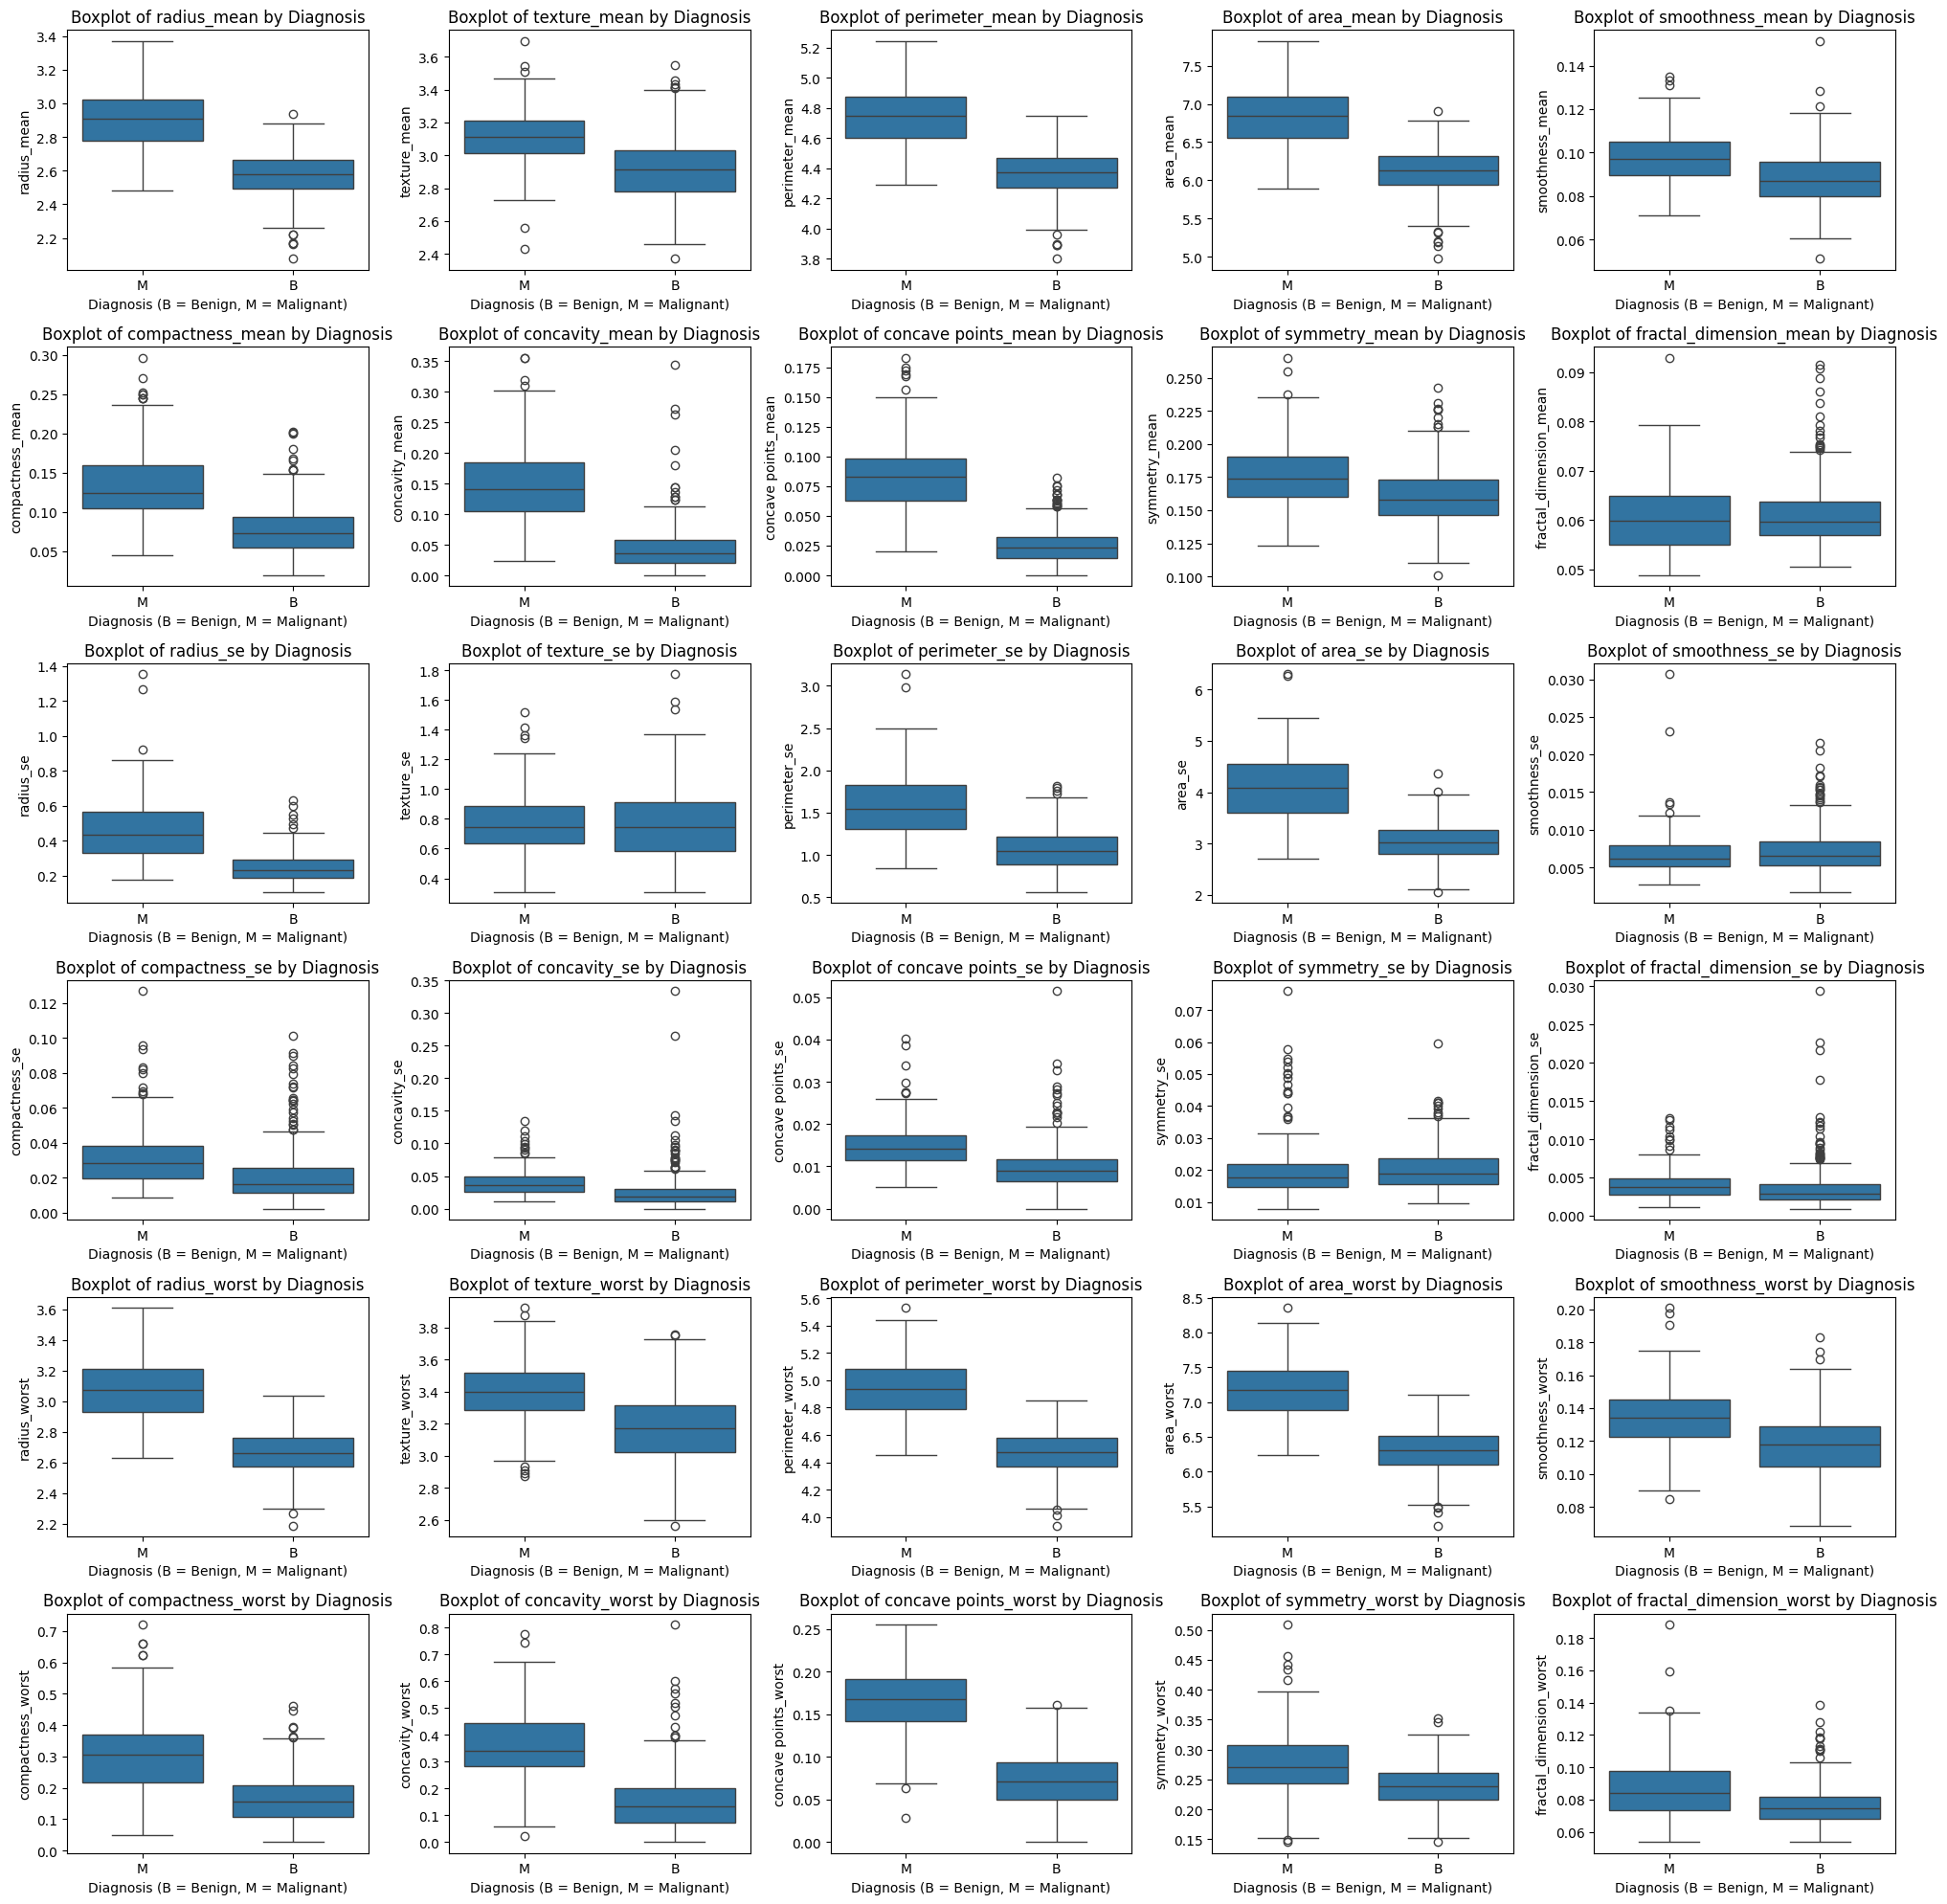

In [ ]:
# Creating boxplots for each feature grouped by diagnosis (B = Benign, M = Malignant)
fig, ax = plt.subplots(6,5, figsize=(20, 20))

for i, subplot in zip(ncols_d2, ax.flatten()):
    sns.boxplot(x='diagnosis', y=i, data=d_f, ax=subplot)
    subplot.set_title(f'Boxplot of {i} by Diagnosis')
    subplot.set_xlabel('Diagnosis (B = Benign, M = Malignant)')
    subplot.set_ylabel(i)

plt.tight_layout()
plt.show()

Correlation Matrix:

In [ ]:
numeric_dataset =ncols_d2

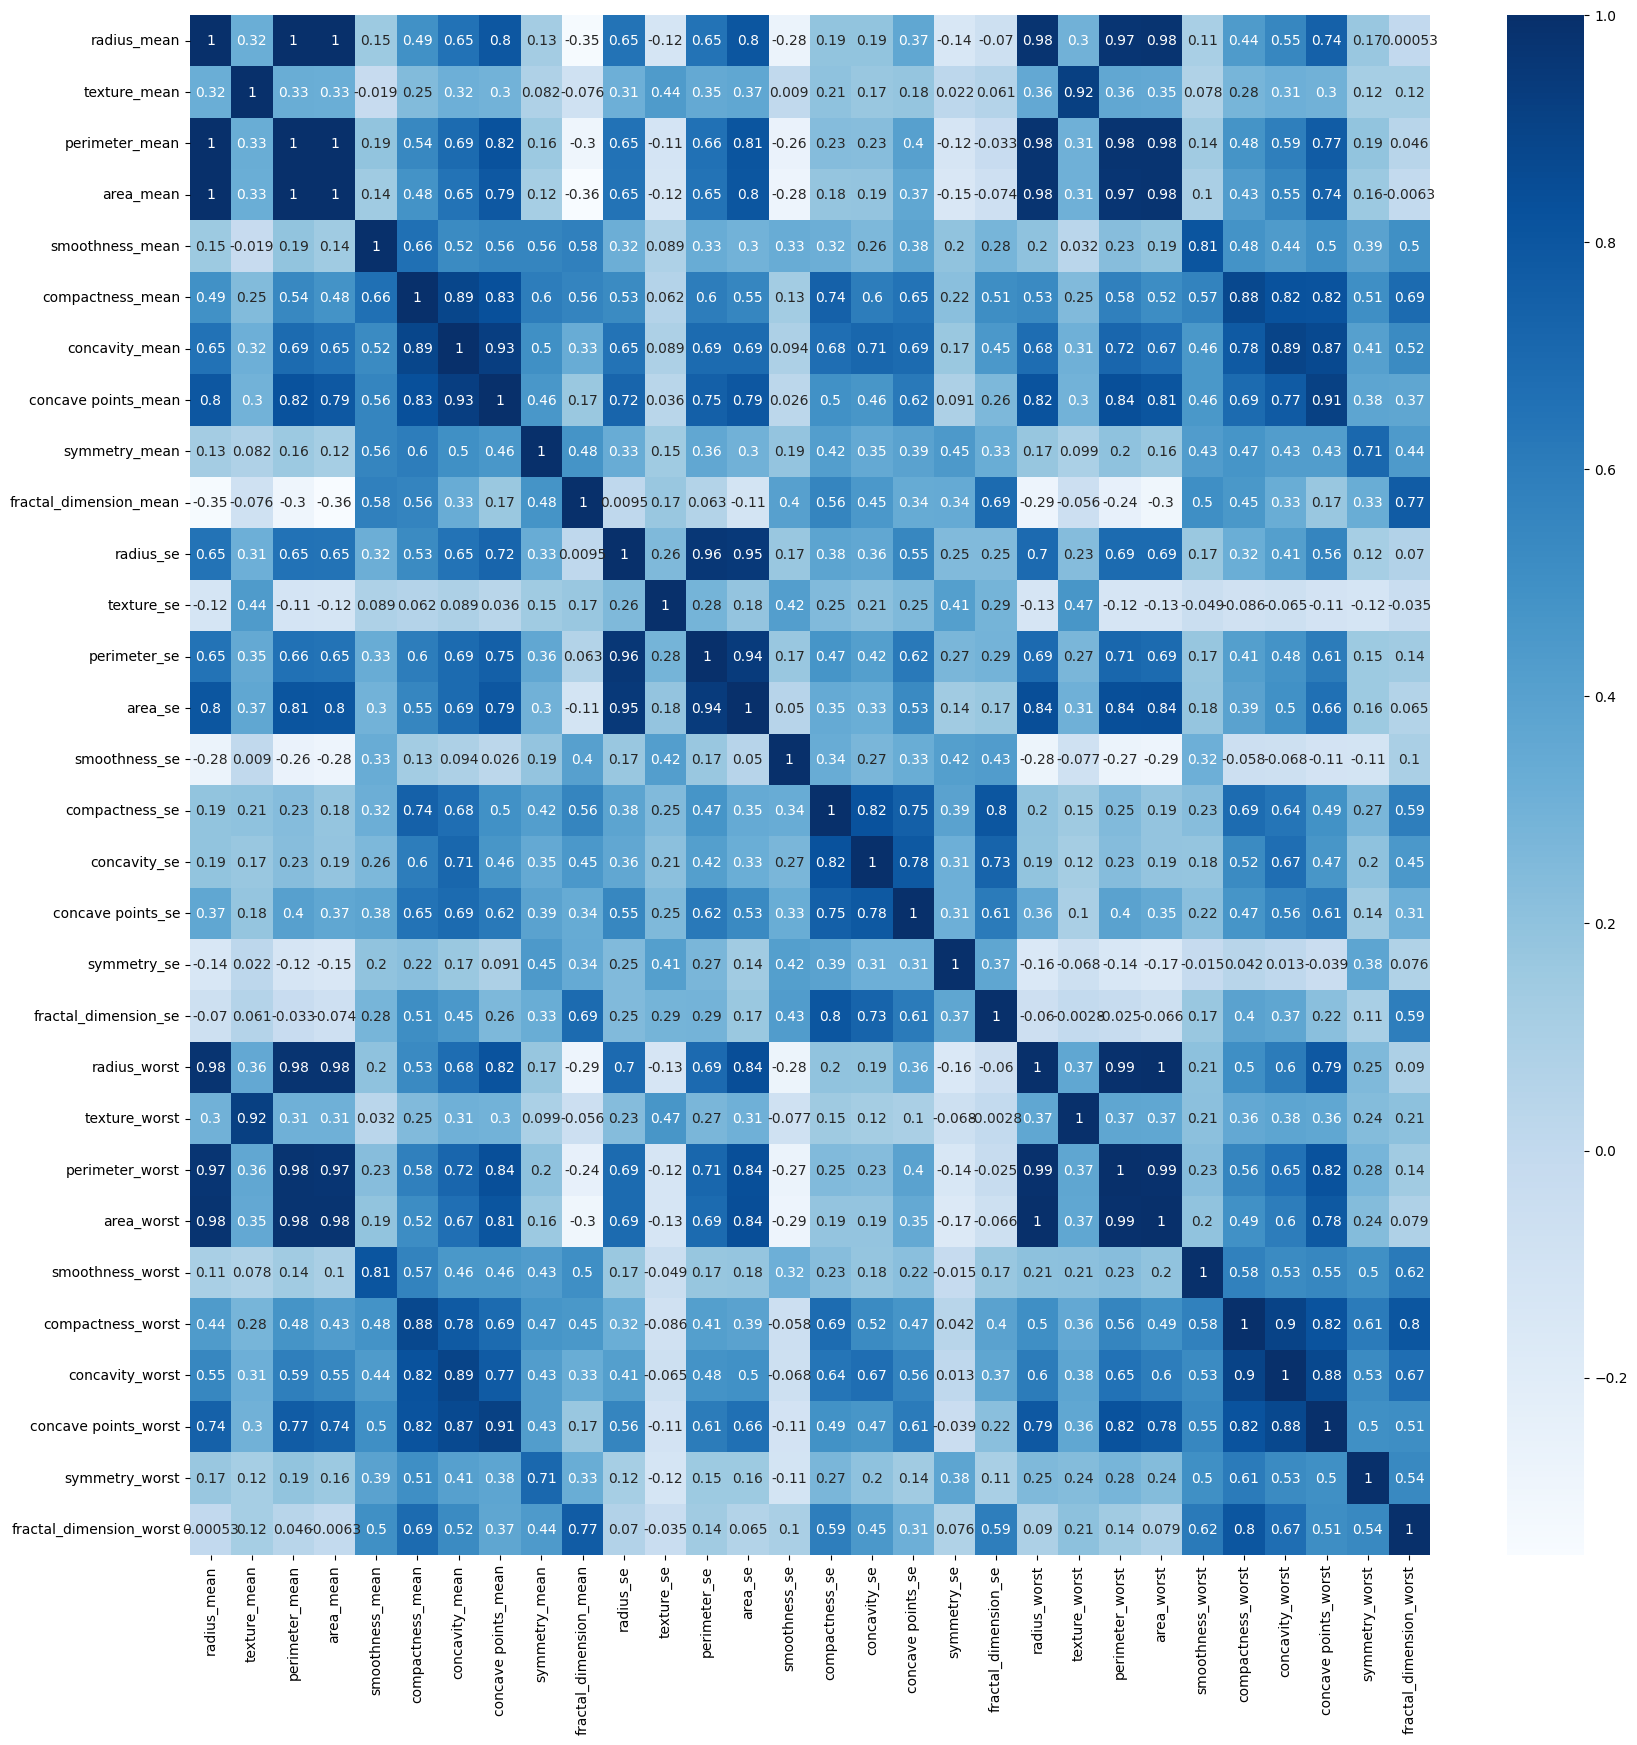

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(numeric_dataset.corr(), cmap='Blues', annot=True)
plt.show()

#### C . Model Training, Evaluation & Tuning

In [ ]:
# Libraries for Preprocessing and Feature Handling
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
print('Class Distribution',d_f['diagnosis'].value_counts())

Y = d_f['diagnosis'].values
print('\nDiagnosis before encoding', np.unique(Y))

le = LabelEncoder()
dataset_diagnosis_encoded = le.fit_transform(Y)
print('\nDiagnosis after encoding', np.unique(dataset_diagnosis_encoded))

Class Distribution diagnosis
B    357
M    212
Name: count, dtype: int64

Diagnosis before encoding ['B' 'M']

Diagnosis after encoding [0 1]


In [ ]:
#Using MinMaxScaler approach Scaling the numerical values to bring them to similar range
scaler = MinMaxScaler()
scaler.fit(numeric_dataset)
x = scaler.transform(numeric_dataset)
print(x)

[[0.66988928 0.04580704 0.70485271 ... 0.92158382 0.64092086 0.43539963]
 [0.7683353  0.42356128 0.75922436 ... 0.66787342 0.26820562 0.23485755]
 [0.73614644 0.55195646 0.7440442  ... 0.85165716 0.44827952 0.2250544 ]
 ...
 [0.61114695 0.75404995 0.61848928 ... 0.51917416 0.1510203  0.16087836]
 [0.76940936 0.78582122 0.79553569 ... 0.92034602 0.54238622 0.46909286]
 [0.07197132 0.65606019 0.06114889 ... 0.         0.29417563 0.10701653]]


In [ ]:
X = x #Dataset after droping 'ID' and 'Diagnosis' column and Scaled Values
Y = dataset_diagnosis_encoded #Diagnosis column after encoding to [0 1]

#### C . Model Training, Evaluation & Tuning

Balancing & Train-Test Split of Dataset:

**Chosen split ratio : `[70/30]`**

`70%` - Training set

`30%` - Testing set

A 70/30 split is a commonly accepted ratio for splitting data into train and test sets. I chose this split because the given dataset is moderately small, with 569 samples. Due to the imbalance of target variable distribution. `SMOTE` is used to balance the target variable.

In [ ]:
# Libraries for Data Splitting & Balancing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train_Bal, X_test, Y_train_Bal, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print("Before SMOTE:", np.bincount(Y_train_Bal))

smote = SMOTE()
X_train, Y_train = smote.fit_resample(X_train_Bal, Y_train_Bal)

print("\nAfter SMOTE:", np.bincount(Y_train))

print("\nShape of X_train", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Before SMOTE: [249 149]

After SMOTE: [249 249]

Shape of X_train (498, 30)
Shape of X_test: (171, 30)
Shape of Y_train: (498,)
Shape of Y_test: (171,)


Class Distribution after Random Over-Sampling:
[249 249]


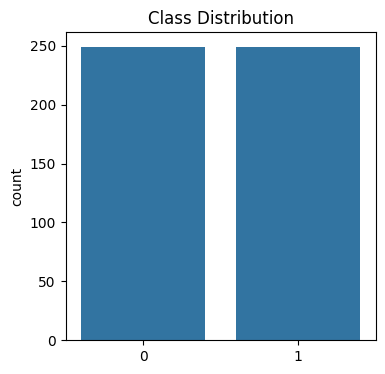

In [ ]:
print("Class Distribution after Random Over-Sampling:")
print(np.bincount(Y_train))

plt.figure(figsize=(4,4))
plt.title('Class Distribution')
sns.countplot(x=Y_train)
plt.show()

In [ ]:
# Libraries for Model Performance Evaluation, Selection and Hyperparameter Tuning (GridSearchCV)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import GridSearchCV

#### 1. Performance Metrics of `Logistic Regression` Classifier

Logistic Regression (Before Tuning):

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

Logistic Regression Model (Accuracy) - 98.83%

Logistic Regression Model (Precision) - 98.41%

Logistic Regression Model (Recall) - 98.41%

Logistic Regression Model (F1 Score) - 98.41%

Logistic Regression Model (AUROC) - 98.74%

               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       108
   Malignant       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



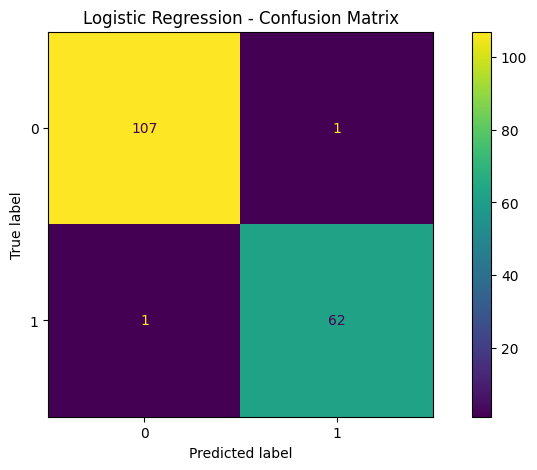

In [ ]:
y_pred = log_reg.predict(X_test)

l_r_accuracy = log_reg.score(X_test, Y_test)
l_r_precision = precision_score(Y_test, y_pred)
l_r_recall = recall_score(Y_test, y_pred)
l_r_f1 = f1_score(Y_test, y_pred)
l_r_roc_auc = roc_auc_score(Y_test, y_pred)

log_reg_accuracy = l_r_accuracy * 100
log_reg_precision = l_r_precision * 100
log_reg_recall = l_r_recall * 100
log_reg_f1 = l_r_f1 * 100
log_reg_roc_auc = l_r_roc_auc* 100

print(f"Logistic Regression Model (Accuracy) - {log_reg_accuracy:.2f}%")
print(f"\nLogistic Regression Model (Precision) - {log_reg_precision:.2f}%")
print(f"\nLogistic Regression Model (Recall) - {log_reg_recall:.2f}%")
print(f"\nLogistic Regression Model (F1 Score) - {log_reg_f1:.2f}%")
print(f"\nLogistic Regression Model (AUROC) - {log_reg_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, Y_test, ax=ax)
ax.set_title('Logistic Regression - Confusion Matrix')
plt.show()

Logistic Regression (After Tuning):

Tuned Logistic Regression Model (Accuracy) - 98.25%

Tuned Logistic Regression Model (Precision) - 96.88%

Tuned Logistic Regression Model (Recall) - 98.41%

Tuned Logistic Regression Model (F1 Score) - 97.64%

Tuned Logistic Regression Model (AUROC) - 99.82%

               precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       108
   Malignant       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



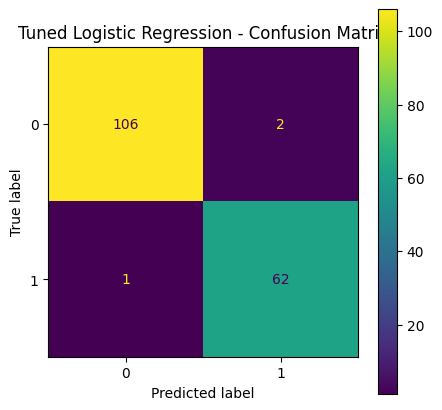

In [ ]:
log_reg_params = {'C': [10]}
grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='roc_auc')
grid.fit(X_train, Y_train)

best_log_reg_model = grid.best_estimator_
y_pred_tuned = best_log_reg_model.predict(X_test)
y_proba_tuned = best_log_reg_model.predict_proba(X_test)[:, 1]

t_l_r_accuracy = accuracy_score(Y_test, y_pred_tuned)
t_l_r_precision = precision_score(Y_test, y_pred_tuned)
t_l_r_recall = recall_score(Y_test, y_pred_tuned)
t_l_r_f1 = f1_score(Y_test, y_pred_tuned)
t_l_r_roc_auc = roc_auc_score(Y_test, y_proba_tuned)

tuned_log_reg_accuracy = t_l_r_accuracy * 100
tuned_log_reg_precision = t_l_r_precision * 100
tuned_log_reg_recall = t_l_r_recall * 100
tuned_log_reg_f1 = t_l_r_f1 * 100
tuned_log_reg_roc_auc = t_l_r_roc_auc * 100

print(f"Tuned Logistic Regression Model (Accuracy) - {tuned_log_reg_accuracy:.2f}%")
print(f"\nTuned Logistic Regression Model (Precision) - {tuned_log_reg_precision:.2f}%")
print(f"\nTuned Logistic Regression Model (Recall) - {tuned_log_reg_recall:.2f}%")
print(f"\nTuned Logistic Regression Model (F1 Score) - {tuned_log_reg_f1:.2f}%")
print(f"\nTuned Logistic Regression Model (AUROC) - {tuned_log_reg_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred_tuned, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_log_reg_model, X_test, Y_test, ax=ax)
ax.set_title('Tuned Logistic Regression - Confusion Matrix')
plt.show()

#### 2. Performance Metrics of `Support Vector Machine` Classifier

Support Vector Machine (Before Tuning):

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, Y_train)

SVC(probability=True, random_state=42)

SVC Model (Accuracy) - 98.83%

SVC Model (Precision) - 98.41%

SVC Model (Recall) - 98.41%

SVC Model (F1 Score) - 98.41%

SVC Model (AUROC) - 98.74%

               precision    recall  f1-score   support

      Benign       0.99      0.99      0.99       108
   Malignant       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



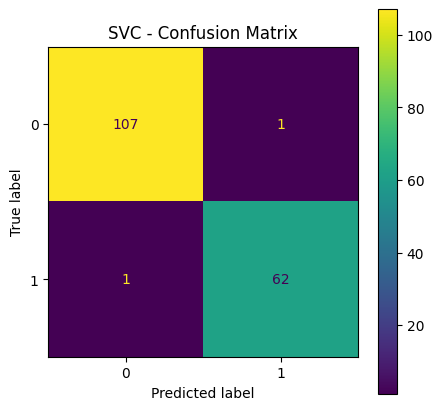

In [ ]:
y_pred = svc.predict(X_test)

s_accuracy = svc.score(X_test, Y_test)
s_precision = precision_score(Y_test, y_pred)
s_recall = recall_score(Y_test, y_pred)
s_f1 = f1_score(Y_test, y_pred)
s_roc_auc = roc_auc_score(Y_test, y_pred)

svc_accuracy = s_accuracy * 100
svc_precision = s_precision * 100
svc_recall = s_recall * 100
svc_f1 = s_f1 * 100
svc_roc_auc = s_roc_auc* 100

print(f"SVC Model (Accuracy) - {svc_accuracy:.2f}%")
print(f"\nSVC Model (Precision) - {svc_precision:.2f}%")
print(f"\nSVC Model (Recall) - {svc_recall:.2f}%")
print(f"\nSVC Model (F1 Score) - {svc_f1:.2f}%")
print(f"\nSVC Model (AUROC) - {svc_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test, ax=ax)
ax.set_title('SVC - Confusion Matrix')
plt.show()

Support Vector Machine (After Tuning):

Tuned SVC Model (Accuracy) - 97.08%

Tuned SVC Model (Precision) - 95.31%

Tuned SVC Model (Recall) - 96.83%

Tuned SVC Model (F1 Score) - 96.06%

Tuned SVC Model (AUROC) - 99.66%

               precision    recall  f1-score   support

      Benign       0.98      0.97      0.98       108
   Malignant       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



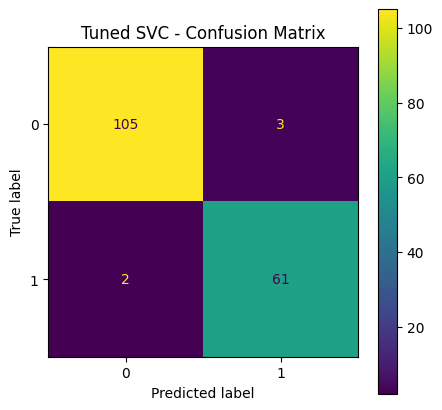

In [ ]:
svm_params = {'C': [10], 'kernel': ['linear', 'rbf']}
grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=5, scoring='roc_auc')
grid.fit(X_train, Y_train)

best_svc_model = grid.best_estimator_
y_pred_tuned = best_svc_model.predict(X_test)
y_proba_tuned = best_svc_model.predict_proba(X_test)[:, 1]

t_s_accuracy = accuracy_score(Y_test, y_pred_tuned)
t_s_precision = precision_score(Y_test, y_pred_tuned)
t_s_recall = recall_score(Y_test, y_pred_tuned)
t_s_f1 = f1_score(Y_test, y_pred_tuned)
t_s_roc_auc = roc_auc_score(Y_test, y_proba_tuned)

tuned_svc_accuracy = t_s_accuracy * 100
tuned_svc_precision = t_s_precision * 100
tuned_svc_recall = t_s_recall * 100
tuned_svc_f1 = t_s_f1 * 100
tuned_svc_roc_auc = t_s_roc_auc * 100

print(f"Tuned SVC Model (Accuracy) - {tuned_svc_accuracy:.2f}%")
print(f"\nTuned SVC Model (Precision) - {tuned_svc_precision:.2f}%")
print(f"\nTuned SVC Model (Recall) - {tuned_svc_recall:.2f}%")
print(f"\nTuned SVC Model (F1 Score) - {tuned_svc_f1:.2f}%")
print(f"\nTuned SVC Model (AUROC) - {tuned_svc_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred_tuned, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_svc_model, X_test, Y_test, ax=ax)
ax.set_title('Tuned SVC - Confusion Matrix')
plt.show()

#### 3. Performance Metrics of `Decision Tree` Classifier

Decision Tree (Before Tuning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(random_state=42)
dtree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Classifier Model (Accuracy) - 92.98%

Decision Tree Classifier Model (Precision) - 89.23%

Decision Tree Classifier Model (Recall) - 92.06%

Decision Tree Classifier Model (F1 Score) - 90.62%

Decision Tree Classifier Model (AUROC) - 92.79%

               precision    recall  f1-score   support

      Benign       0.95      0.94      0.94       108
   Malignant       0.89      0.92      0.91        63

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



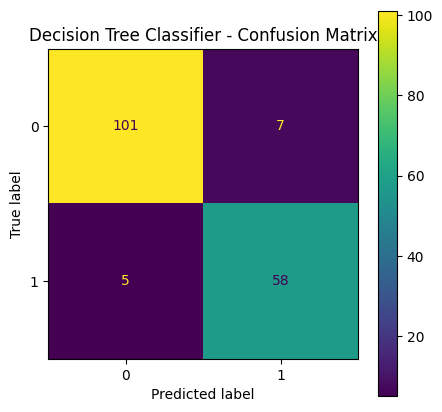

In [ ]:
y_pred = dtree_clf.predict(X_test)

dc_accuracy = dtree_clf.score(X_test, Y_test)
dc_precision = precision_score(Y_test, y_pred)
dc_recall = recall_score(Y_test, y_pred)
dc_f1 = f1_score(Y_test, y_pred)
dc_roc_auc = roc_auc_score(Y_test, y_pred)

dtree_clf_accuracy = dc_accuracy * 100
dtree_clf_precision = dc_precision * 100
dtree_clf_recall = dc_recall * 100
dtree_clf_f1 = dc_f1 * 100
dtree_clf_roc_auc = dc_roc_auc* 100

print(f"Decision Tree Classifier Model (Accuracy) - {dtree_clf_accuracy:.2f}%")
print(f"\nDecision Tree Classifier Model (Precision) - {dtree_clf_precision:.2f}%")
print(f"\nDecision Tree Classifier Model (Recall) - {dtree_clf_recall:.2f}%")
print(f"\nDecision Tree Classifier Model (F1 Score) - {dtree_clf_f1:.2f}%")
print(f"\nDecision Tree Classifier Model (AUROC) - {dtree_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(dtree_clf, X_test, Y_test, ax=ax)
ax.set_title('Decision Tree Classifier - Confusion Matrix')
plt.show()

Decision Tree (After Tuning)

Tuned Decision Tree Model (Accuracy) - 95.32%

Tuned Decision Tree Model (Precision) - 91.04%

Tuned Decision Tree Model (Recall) - 96.83%

Tuned Decision Tree Model (F1 Score) - 93.85%

Tuned Decision Tree Model (AUROC) - 95.52%

               precision    recall  f1-score   support

      Benign       0.98      0.94      0.96       108
   Malignant       0.91      0.97      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.95      0.95      0.95       171



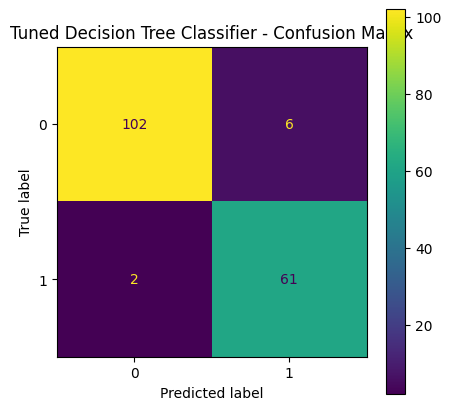

In [ ]:
dtree_params = {'max_depth':[3]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dtree_params, cv=5, scoring='roc_auc')
grid.fit(X_train, Y_train)

best_dtree_clf = grid.best_estimator_
y_pred_tuned = best_dtree_clf.predict(X_test)
y_proba_tuned = best_dtree_clf.predict_proba(X_test)[:, 1]

t_dc_accuracy = accuracy_score(Y_test, y_pred_tuned)
t_dc_precision = precision_score(Y_test, y_pred_tuned)
t_dc_recall = recall_score(Y_test, y_pred_tuned)
t_dc_f1 = f1_score(Y_test, y_pred_tuned)
t_dc_roc_auc = roc_auc_score(Y_test, y_proba_tuned)

tuned_dtree_clf_accuracy = t_dc_accuracy * 100
tuned_dtree_clf_precision = t_dc_precision * 100
tuned_dtree_clf_recall = t_dc_recall * 100
tuned_dtree_clf_f1 = t_dc_f1 * 100
tuned_dtree_clf_roc_auc = t_dc_roc_auc * 100

print(f"Tuned Decision Tree Model (Accuracy) - {tuned_dtree_clf_accuracy:.2f}%")
print(f"\nTuned Decision Tree Model (Precision) - {tuned_dtree_clf_precision:.2f}%")
print(f"\nTuned Decision Tree Model (Recall) - {tuned_dtree_clf_recall:.2f}%")
print(f"\nTuned Decision Tree Model (F1 Score) - {tuned_dtree_clf_f1:.2f}%")
print(f"\nTuned Decision Tree Model (AUROC) - {tuned_dtree_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred_tuned, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_dtree_clf, X_test, Y_test, ax=ax)
ax.set_title('Tuned Decision Tree Classifier - Confusion Matrix')
plt.show()

#### 4. Performance Metrics of `Randon Forest` Classifier

Random Forest (Before Tuning):

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

Random Forest Classifier Model (Accuracy) - 98.25%

Random Forest Classifier Model (Precision) - 96.88%

Random Forest Classifier Model (Recall) - 98.41%

Random Forest Classifier Model (F1 Score) - 97.64%

Random Forest Classifier Model (AUROC) - 98.28%

               precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       108
   Malignant       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



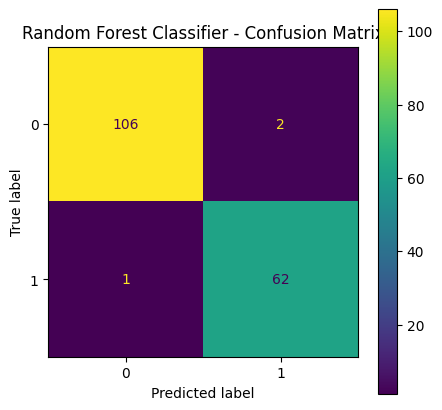

In [ ]:
y_pred = rf_clf.predict(X_test)

rc_accuracy = rf_clf.score(X_test, Y_test)
rc_precision = precision_score(Y_test, y_pred)
rc_recall = recall_score(Y_test, y_pred)
rc_f1 = f1_score(Y_test, y_pred)
rc_roc_auc = roc_auc_score(Y_test, y_pred)

rf_clf_accuracy = rc_accuracy * 100
rf_clf_precision = rc_precision * 100
rf_clf_recall = rc_recall * 100
rf_clf_f1 = rc_f1 * 100
rf_clf_roc_auc = rc_roc_auc* 100

print(f"Random Forest Classifier Model (Accuracy) - {rf_clf_accuracy:.2f}%")
print(f"\nRandom Forest Classifier Model (Precision) - {rf_clf_precision:.2f}%")
print(f"\nRandom Forest Classifier Model (Recall) - {rf_clf_recall:.2f}%")
print(f"\nRandom Forest Classifier Model (F1 Score) - {rf_clf_f1:.2f}%")
print(f"\nRandom Forest Classifier Model (AUROC) - {rf_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, Y_test, ax=ax)
ax.set_title('Random Forest Classifier - Confusion Matrix')
plt.show()

Random Forest (After Tuning):

Tuned Random Forest Classifier Model (Accuracy) - 97.66%

Tuned Random Forest Classifier Model (Precision) - 94.03%

Tuned Random Forest Classifier Model (Recall) - 100.00%

Tuned Random Forest Classifier Model (F1 Score) - 96.92%

Tuned Random Forest Classifier Model (AUROC) - 99.79%

               precision    recall  f1-score   support

      Benign       1.00      0.96      0.98       108
   Malignant       0.94      1.00      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



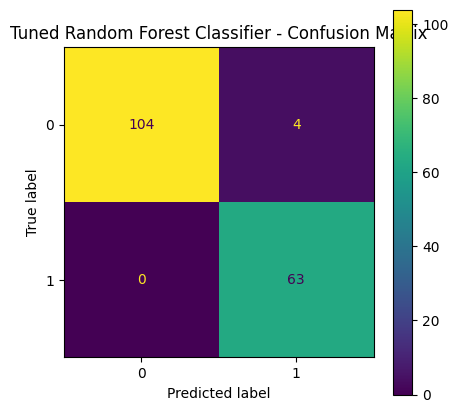

In [ ]:
rf_params = {'n_estimators': [50,100,200], 'max_depth': [3]}
grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')
grid.fit(X_train, Y_train)

best_rf_clf = grid.best_estimator_
y_pred_tuned = best_rf_clf.predict(X_test)
y_proba_tuned = best_rf_clf.predict_proba(X_test)[:, 1]

t_rc_accuracy = accuracy_score(Y_test, y_pred_tuned)
t_rc_precision = precision_score(Y_test, y_pred_tuned)
t_rc_recall = recall_score(Y_test, y_pred_tuned)
t_rc_f1 = f1_score(Y_test, y_pred_tuned)
t_rc_roc_auc = roc_auc_score(Y_test, y_proba_tuned)

tuned_rf_clf_accuracy = t_rc_accuracy * 100
tuned_rf_clf_precision = t_rc_precision * 100
tuned_rf_clf_recall = t_rc_recall * 100
tuned_rf_clf_f1 = t_rc_f1 * 100
tuned_rf_clf_roc_auc = t_rc_roc_auc * 100

print(f"Tuned Random Forest Classifier Model (Accuracy) - {tuned_rf_clf_accuracy:.2f}%")
print(f"\nTuned Random Forest Classifier Model (Precision) - {tuned_rf_clf_precision:.2f}%")
print(f"\nTuned Random Forest Classifier Model (Recall) - {tuned_rf_clf_recall:.2f}%")
print(f"\nTuned Random Forest Classifier Model (F1 Score) - {tuned_rf_clf_f1:.2f}%")
print(f"\nTuned Random Forest Classifier Model (AUROC) - {tuned_rf_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred_tuned, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_rf_clf, X_test, Y_test, ax=ax)
ax.set_title('Tuned Random Forest Classifier - Confusion Matrix')
plt.show()

#### 5. Performance Metrics of `K-Nearest Neighbors` Classifier

K-Nearest Neighbors (Before Tuning):

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier()

KNeighbors Classifier Model (Accuracy) - 95.91%

KNeighbors Classifier Model (Precision) - 92.42%

KNeighbors Classifier Model (Recall) - 96.83%

KNeighbors Classifier Model (F1 Score) - 94.57%

KNeighbors Classifier Model (AUROC) - 96.10%

               precision    recall  f1-score   support

      Benign       0.98      0.95      0.97       108
   Malignant       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



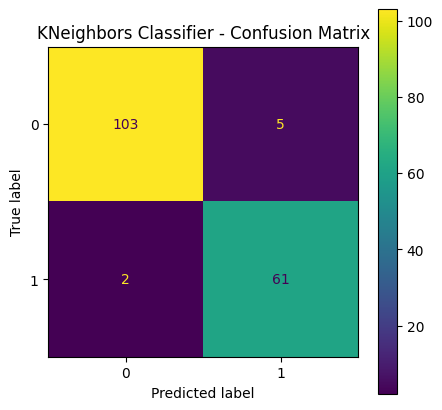

In [ ]:
y_pred = knn_clf.predict(X_test)

kc_accuracy = knn_clf.score(X_test, Y_test)
kc_precision = precision_score(Y_test, y_pred)
kc_recall = recall_score(Y_test, y_pred)
kc_f1 = f1_score(Y_test, y_pred)
kc_roc_auc = roc_auc_score(Y_test, y_pred)

knn_clf_accuracy = kc_accuracy * 100
knn_clf_precision = kc_precision * 100
knn_clf_recall = kc_recall * 100
knn_clf_f1 = kc_f1 * 100
knn_clf_roc_auc = kc_roc_auc* 100

print(f"KNeighbors Classifier Model (Accuracy) - {knn_clf_accuracy:.2f}%")
print(f"\nKNeighbors Classifier Model (Precision) - {knn_clf_precision:.2f}%")
print(f"\nKNeighbors Classifier Model (Recall) - {knn_clf_recall:.2f}%")
print(f"\nKNeighbors Classifier Model (F1 Score) - {knn_clf_f1:.2f}%")
print(f"\nKNeighbors Classifier Model (AUROC) - {knn_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred, target_names=['Benign','Malignant']))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, Y_test, ax=ax)
ax.set_title('KNeighbors Classifier - Confusion Matrix')
plt.show()

K-Nearest Neighbors (After Tuning):

Tuned KNeighbors Classifier Model (Accuracy) - 96.49%

Tuned KNeighbors Classifier Model (Precision) - 93.85%

Tuned KNeighbors Classifier Model (Recall) - 96.83%

Tuned KNeighbors Classifier Model (F1 Score) - 95.31%

Tuned KNeighbors Classifier Model (AUROC) - 99.40%

               precision    recall  f1-score   support

      Benign       0.98      0.96      0.97       108
   Malignant       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



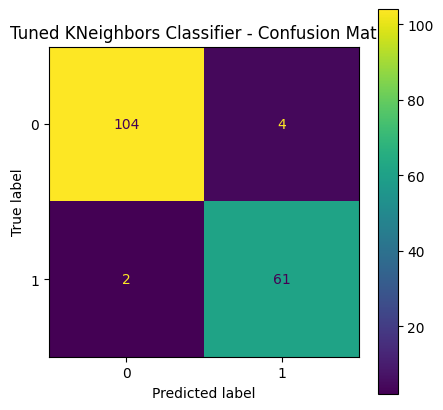

In [ ]:
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='roc_auc')
grid.fit(X_train, Y_train)

best_knn_clf = grid.best_estimator_
y_pred_tuned = best_knn_clf.predict(X_test)
y_proba_tuned = best_knn_clf.predict_proba(X_test)[:, 1]

t_kc_accuracy = accuracy_score(Y_test, y_pred_tuned)
t_kc_precision = precision_score(Y_test, y_pred_tuned)
t_kc_recall = recall_score(Y_test, y_pred_tuned)
t_kc_f1 = f1_score(Y_test, y_pred_tuned)
t_kc_roc_auc = roc_auc_score(Y_test, y_proba_tuned)

tuned_knn_clf_accuracy = t_kc_accuracy * 100
tuned_knn_clf_precision = t_kc_precision * 100
tuned_knn_clf_recall = t_kc_recall * 100
tuned_knn_clf_f1 = t_kc_f1 * 100
tuned_knn_clf_roc_auc = t_kc_roc_auc * 100

print(f"Tuned KNeighbors Classifier Model (Accuracy) - {tuned_knn_clf_accuracy:.2f}%")
print(f"\nTuned KNeighbors Classifier Model (Precision) - {tuned_knn_clf_precision:.2f}%")
print(f"\nTuned KNeighbors Classifier Model (Recall) - {tuned_knn_clf_recall:.2f}%")
print(f"\nTuned KNeighbors Classifier Model (F1 Score) - {tuned_knn_clf_f1:.2f}%")
print(f"\nTuned KNeighbors Classifier Model (AUROC) - {tuned_knn_clf_roc_auc:.2f}%")
print('\n', classification_report(Y_test, y_pred_tuned, target_names=['Benign','Malignant']))



fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_estimator(best_knn_clf, X_test, Y_test, ax=ax)
ax.set_title('Tuned KNeighbors Classifier - Confusion Matrix')
plt.show()

#### Comparsion of Performance Metrics of Classifiers Before & After Tuning:

In [ ]:
# Collect the all Performance Metrics (Before Tuning):
bt_accuracy = {'Accuracy' : [log_reg_accuracy, svc_accuracy, dtree_clf_accuracy, rf_clf_accuracy, knn_clf_accuracy]}
bt_precision = { 'Precision' : [log_reg_precision,svc_precision,dtree_clf_precision,rf_clf_precision,knn_clf_precision]}
bt_recall = { 'Recall' : [log_reg_recall,svc_recall,dtree_clf_recall,rf_clf_recall,knn_clf_recall]}
bt_f1 = { 'F1' : [log_reg_f1,svc_f1,dtree_clf_f1,rf_clf_f1,knn_clf_f1]}
bt_roc_auc = { 'AUROC' : [log_reg_roc_auc,svc_roc_auc,dtree_clf_roc_auc,rf_clf_roc_auc,knn_clf_roc_auc]}

# Collect the all Performance Metrics (After Tuning):
at_accuracy = { 'Accuracy' : [tuned_log_reg_accuracy,tuned_svc_accuracy,tuned_dtree_clf_accuracy,tuned_rf_clf_accuracy,tuned_knn_clf_accuracy]}
at_precision = { 'Precision' : [tuned_log_reg_precision,tuned_svc_precision,tuned_dtree_clf_precision,tuned_rf_clf_precision,tuned_knn_clf_precision]}
at_recall = { 'Recall' : [tuned_log_reg_recall,tuned_svc_recall,tuned_dtree_clf_recall,tuned_rf_clf_recall,tuned_knn_clf_recall]}
at_f1 = { 'F1' : [tuned_log_reg_f1,tuned_svc_f1,tuned_dtree_clf_f1,tuned_rf_clf_f1,tuned_knn_clf_f1]}
at_roc_auc = { 'AUROC' : [tuned_log_reg_roc_auc,tuned_svc_roc_auc,tuned_dtree_clf_roc_auc,tuned_rf_clf_roc_auc,tuned_knn_clf_roc_auc]}

In [ ]:
# Create a dictionary to hold all Performance Metrics of Classifiers (Before Tuning) :
results_pm_class_bt = {
    'Classifier': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy Score': bt_accuracy['Accuracy'],
    'Precision Score': bt_precision['Precision'],
    'Recall Score': bt_recall['Recall'],
    'F1 Score': bt_f1['F1'],
    'AUROC Score': bt_roc_auc['AUROC']
}

# Create a dictionary to hold all Performance Metrics of Classifiers (After Tuning):
results_pm_class_at = {
    'Classifier': ['Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy Score': at_accuracy['Accuracy'],
    'Precision Score': at_precision['Precision'],
    'Recall Score': at_recall['Recall'],
    'F1 Score': at_f1['F1'],
    'AUROC Score': at_roc_auc['AUROC']
}
# Create a pandas DataFrame from the results
results_perfmet_class_beftun = pd.DataFrame(results_pm_class_bt)
results_perfmet_class_afttun = pd.DataFrame(results_pm_class_at)


print("Performance Metrics of Classifiers Sorted by AUROC (Before Tuning):\n")
print(results_perfmet_class_beftun.sort_values(by='AUROC Score', ascending=False).to_string(index=False, float_format='{:.2f}'.format))
print("\n")
print("Performance Metrics of Classifiers Sorted by AUROC (After Tuning):\n")
print(results_perfmet_class_afttun.sort_values(by='AUROC Score', ascending=False).to_string(index=False, float_format='{:.2f}'.format))

Performance Metrics of Classifiers Sorted by AUROC (Before Tuning):

            Classifier  Accuracy Score  Precision Score  Recall Score  F1 Score  AUROC Score
   Logistic Regression           98.83            98.41         98.41     98.41        98.74
Support Vector Machine           98.83            98.41         98.41     98.41        98.74
         Random Forest           98.25            96.88         98.41     97.64        98.28
   K-Nearest Neighbors           95.91            92.42         96.83     94.57        96.10
         Decision Tree           92.98            89.23         92.06     90.62        92.79


Performance Metrics of Classifiers Sorted by AUROC (After Tuning):

            Classifier  Accuracy Score  Precision Score  Recall Score  F1 Score  AUROC Score
   Logistic Regression           98.25            96.88         98.41     97.64        99.82
         Random Forest           97.66            94.03        100.00     96.92        99.79
Support Vector Machine  

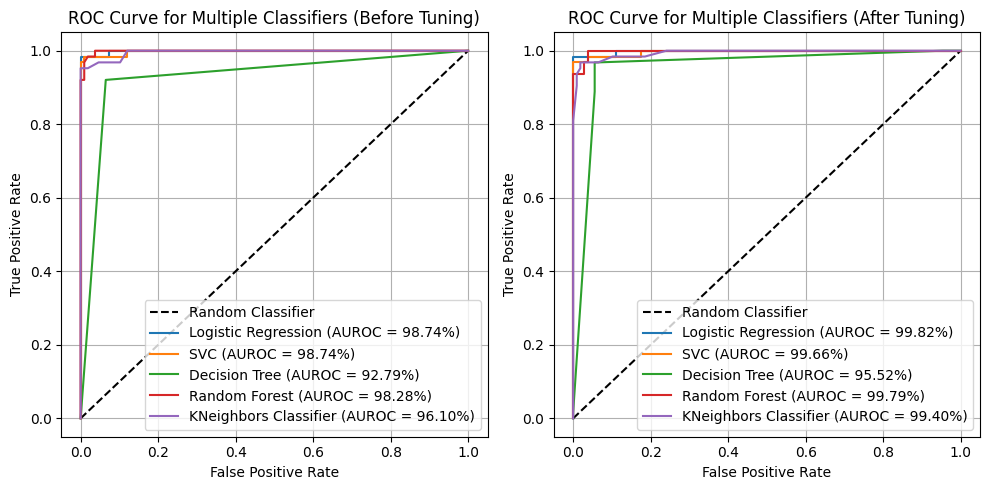

In [ ]:
# To Create a figure with subplot (before tuning - AUROC)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot all ROC curves (Before Tuning) on the first subplot
axes[0].plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal line

fpr_lr_bt, tpr_lr_bt, _ = roc_curve(Y_test, log_reg.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_lr_bt, tpr_lr_bt, label=f'Logistic Regression (AUROC = {log_reg_roc_auc:.2f}%)')

fpr_svc_bt, tpr_svc_bt, _ = roc_curve(Y_test, svc.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_svc_bt, tpr_svc_bt, label=f'SVC (AUROC = {svc_roc_auc:.2f}%)')

fpr_dt_bt, tpr_dt_bt, _ = roc_curve(Y_test, dtree_clf.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_dt_bt, tpr_dt_bt, label=f'Decision Tree (AUROC = {dtree_clf_roc_auc:.2f}%)')

fpr_rf_bt, tpr_rf_bt, _ = roc_curve(Y_test, rf_clf.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_rf_bt, tpr_rf_bt, label=f'Random Forest (AUROC = {rf_clf_roc_auc:.2f}%)')

fpr_knn_bt, tpr_knn_bt, _ = roc_curve(Y_test, knn_clf.predict_proba(X_test)[:, 1])
axes[0].plot(fpr_knn_bt, tpr_knn_bt, label=f'KNeighbors Classifier (AUROC = {knn_clf_roc_auc:.2f}%)')


axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve for Multiple Classifiers (Before Tuning)')
axes[0].legend()
axes[0].grid(True)

# To Create a figure with subplot (After tuning - AUROC)
axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal line

fpr_lr_at, tpr_lr_at, _ = roc_curve(Y_test, best_log_reg_model.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_lr_at, tpr_lr_at, label=f'Logistic Regression (AUROC = {tuned_log_reg_roc_auc:.2f}%)')

fpr_svc, tpr_svc, _ = roc_curve(Y_test, best_svc_model.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_svc, tpr_svc, label=f'SVC (AUROC = {tuned_svc_roc_auc:.2f}%)')

fpr_dt, tpr_dt, _ = roc_curve(Y_test, best_dtree_clf.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUROC = {tuned_dtree_clf_roc_auc:.2f}%)')

fpr_rf, tpr_rf, _ = roc_curve(Y_test, best_rf_clf.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUROC = {tuned_rf_clf_roc_auc:.2f}%)')

fpr_knn, tpr_knn, _ = roc_curve(Y_test, best_knn_clf.predict_proba(X_test)[:, 1])
axes[1].plot(fpr_knn, tpr_knn, label=f'KNeighbors Classifier (AUROC = {tuned_knn_clf_roc_auc:.2f}%)')

axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve for Multiple Classifiers (After Tuning)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Feature Importance:

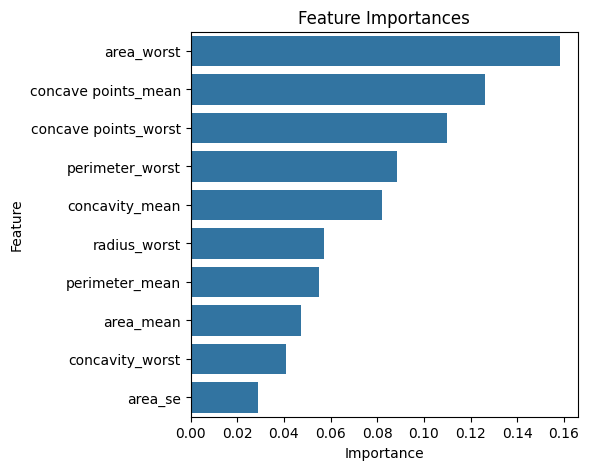

In [ ]:
feature_importances = rf_clf.feature_importances_
feature_names = numeric_dataset.columns

feat_imp_df = pd.DataFrame({'Importance':feature_importances,'Feature': feature_names})
feat_df = feat_imp_df.sort_values(by='Importance', ascending=False).drop_duplicates('Feature')

top10 = feat_df.head(10)


plt.figure(figsize=(5,5))
sns.barplot(x='Importance', y='Feature', data=top10)
plt.title('Feature Importances')
plt.show()